In [1]:
!pip install tdmclient numpy scipy opencv-python tqdm


In [1]:
import numpy as np
from scipy.ndimage import distance_transform_edt
import cv2
import tqdm
from Computer_vision import cv as com
import Filtering as flt 
from Global_Nav import global_nav as gb

In [3]:
# Initiate the communication between the Thymio and the computer
from tdmclient import ClientAsync, aw
client = ClientAsync()
node = await client.wait_for_node()
await node.lock() 

CancelledError: 

In [2]:
#================HYPERPARAMETESRS======================

#REAL SiZE OF THE ENVIRONEMENT (cm)
L = 113.5
W = 81.3
Ratio = L/W

#SiZE IN PIXEL OF THE CORRECTED MAP
Y_res = 480
SIZE = [Y_res, int(Y_res*Ratio)]

#FILTERING PARAMETERS FOR THE ORIGINAL IMAGE
B1_O = 10
B2_O = 80
B3_O = 80
C1_O = 0.5
C2_O = 1.5
M1_O = 8
CL1_O = 2.0

#FILTERING PARAMETERS FOR THE CORRECTED IMAGE
B1_C = 8
B2_C = 80
B3_C = 80
C1_C = 0.4
C2_C = 1.6
M1_C = 5
CL1_C = 4.0

#FILTERING PARAMETERS FOR ROBOT DETECTION
B1_T = 15
B2_T = 100
B3_T = 80
C1_T = 0.4
C2_T = 1.6
M1_T = 5
CL1_C = 4.0


#PARAMETERS TO DETECT THE ENV
Min_area_env = 1000   #Min area in pixel of the env
Env_approx = 0.02

#PARAMETERS TO DETECT THE OBSTACLES
Min_area_obs = 1000   #Min area in pixel of the env
Square_approx = 0.05

#PARAMETERS TO DETECT GOAL
Min_area_goal = 50
Max_area_goal = 10000

#PARAMETERS TO DETECT THE ROBOT
Min_area_rob = 100   #Min area in pixel of the env
Rob_approx = 0.05

#ROBOT CARACTERISTICS
R_ROBOT = 20


#SYMBOLS FOR THE MAP
FREE_SPACE = 0
OCCUPIED_SPACE = -1
GOAL = -3

DEBUG = False

In [49]:
if DEBUG : 
    import matplotlib.pyplot as plt
    %matplotlib inline
#GLOBAL FRAMEWORK TO USE VISION
#EXECUTE CELL ABOVE WITH DEBUG = TRUE FOR TUNING UNTIL EVERYTHING IS CORRECTLY FILTERED AND FOUND
cap = cv2.VideoCapture(0)
    
if not cap.isOpened():
    print("Could not access webcam")






In [62]:
#INITIALIZATION
#GET A FRAME
img = com.get_picture_optimized(cap)
#COMPUTE TRANSFORMATION MATRIX
matrix = com.matrix_perspective(img)
#CORRECT IMAGE
transformed_image = com.convert_perspective(img,matrix)

#PLOTTING
if DEBUG: 
    plt.figure()
    plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
    plt.title("Perspective Corrected Image")
    plt.axis('off')
    plt.show()


#GET GLOBAL MAP
global_map = com.get_map(transformed_image)

#GET ROBOT POSITION AND ORIENTATION
robot = com.get_robot(transformed_image)


length = 100
end_x = int(robot[0][0] + length * np.cos(robot[1]))
end_y = int(robot[0][1] + length * np.sin(robot[1]))
end_point = (end_x, end_y)
if DEBUG : 
    global_map4plot = global_map.copy()
    cv2.arrowedLine(global_map4plot, robot[0], end_point, color=(2, 2, 2), thickness=10)
    plt.imshow(global_map4plot)
    plt.axis('off')
    plt.show()


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[[623 177]
 [594 204]
 [613 238]]
[]
[]
[]
[]
[]
[]
ROBOT FOUND
MAP ANALYZED : 
GOAL FOUND
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[[623 177]
 [594 204]
 [613 238]]
[]
[]
[]
[]
[]
[]
ROBOT FOUND


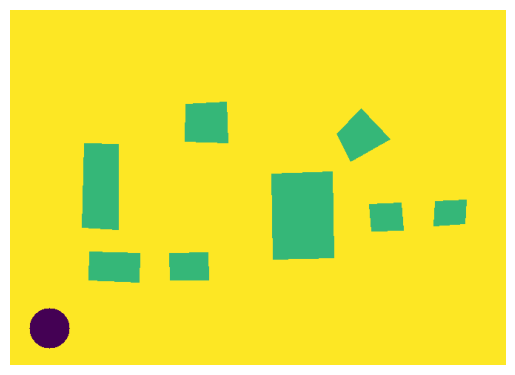

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[-3 -1  0]


In [63]:
global_map[global_map == 1.] = -1.
global_map = global_map.astype(int)
from matplotlib import pyplot as plt
plt.imshow(global_map)
plt.axis('off')
plt.show()
print(global_map)
print(np.unique(global_map))

In [66]:
solved = global_map[:]

path = gb.a_star(global_map, robot[1], 0.8, (robot[0][1], robot[0][0]))

ALL INDEXES ARE : 220, 581, (np.int32(220), np.int32(581))
ALL INDEXES ARE : 220, 581, (np.int32(220), np.int32(581))
ALL INDEXES ARE : 220, 582, (np.int32(220), np.int32(582))
ALL INDEXES ARE : 220, 582, (np.int32(220), np.int32(582))
ALL INDEXES ARE : 220, 583, (np.int32(220), np.int32(583))
ALL INDEXES ARE : 220, 583, (np.int32(220), np.int32(583))
ALL INDEXES ARE : 220, 584, (np.int32(220), np.int32(584))
ALL INDEXES ARE : 220, 584, (np.int32(220), np.int32(584))
ALL INDEXES ARE : 220, 585, (np.int32(220), np.int32(585))
ALL INDEXES ARE : 220, 585, (np.int32(220), np.int32(585))
ALL INDEXES ARE : 220, 586, (np.int32(220), np.int32(586))
ALL INDEXES ARE : 220, 586, (np.int32(220), np.int32(586))
ALL INDEXES ARE : 220, 587, (np.int32(220), np.int32(587))
ALL INDEXES ARE : 220, 587, (np.int32(220), np.int32(587))
ALL INDEXES ARE : 220, 588, (np.int32(220), np.int32(588))
ALL INDEXES ARE : 220, 588, (np.int32(220), np.int32(588))
ALL INDEXES ARE : 220, 589, (np.int32(220), np.int32(589

In [67]:
## HERE : make infinite loop that launches Filtering, motion and local avoidance
#empty = np.zeros((SIZE[0], SIZE[1]))
for i in path : 
    global_map[i[0]][i[1]] = -4 # marker for path in my debug functions

gb.debug_maze_to_bitmap(global_map, 20, filename="Global_Nav/tests/maze.png")

In [8]:
print(robot[0])


(np.int32(141), np.int32(392))
